In [1]:
#https://www.kaggle.com/datasets/muratkokludataset/pistachio-image-dataset

In [2]:
#data directory
data_dir = 'C:\\projects\\all-projects\\vislearn\\pista\\Pistachio_Image_Dataset\\Pistachio_Image_Dataset'
#show folder names
import os
os.listdir(data_dir)


['Kirmizi_Pistachio', 'Pistachio_Image_Dataset_Request.txt', 'Siirt_Pistachio']

In [3]:
#kirmizi directory
kirmizi_dir = "C:\\projects\\all-projects\\vislearn\\pista\\Pistachio_Image_Dataset\\Pistachio_Image_Dataset\\Kirmizi_Pistachio"
#show all files in kirmizi directory
kirmizi_files = os.listdir(kirmizi_dir)
print(kirmizi_files[:10])

['kirmizi (1).jpg', 'kirmizi (10).jpg', 'kirmizi (11).jpg', 'kirmizi (12).jpg', 'kirmizi (13).jpg', 'kirmizi (14).jpg', 'kirmizi (15).jpg', 'kirmizi (16).jpg', 'kirmizi (17).jpg', 'kirmizi (18).jpg']


In [4]:
#siirt directory
siirt_dir = "C:\\projects\\all-projects\\vislearn\\pista\\Pistachio_Image_Dataset\\Pistachio_Image_Dataset\\Siirt_Pistachio"
#show all files in siirt directory
siirt_files = os.listdir(siirt_dir)
print(siirt_files[:10])

['siirt (1).jpg', 'siirt (10).jpg', 'siirt (11).jpg', 'siirt (12).jpg', 'siirt (13).jpg', 'siirt (14).jpg', 'siirt (15).jpg', 'siirt (16).jpg', 'siirt (17).jpg', 'siirt (18).jpg']


In [5]:
#print number of images in each directory
print('total training kirmizi images:', len(os.listdir(kirmizi_dir)))
print('total training siirt images:', len(os.listdir(siirt_dir)))


total training kirmizi images: 1232
total training siirt images: 916


In [6]:
#all of the images
import glob
images = glob.glob("C:\\projects\\all-projects\\vislearn\\pista\\Pistachio_Image_Dataset\\Pistachio_Image_Dataset\\*\\*.jpg")
#number of images
import pandas as pd
print("Number of images: ", len(images))

images = pd.Series(images)

Number of images:  2148


In [7]:
df = pd.DataFrame()

#generate field with Filename
df['Filename'] = images.map(lambda img_name: img_name.split('\\')[-1])

#generate field with ClassID
df['ClassID'] = images.map(lambda img_name: img_name.split('\\')[-2])

df.head()

,Filename,ClassID
0,kirmizi (1).jpg,Kirmizi_Pistachio
1,kirmizi (10).jpg,Kirmizi_Pistachio
2,kirmizi (11).jpg,Kirmizi_Pistachio
3,kirmizi (12).jpg,Kirmizi_Pistachio
4,kirmizi (13).jpg,Kirmizi_Pistachio


In [8]:
class_id_distributionTotal = df['ClassID'].value_counts()
class_id_distributionTotal.head(10)

ClassID
Kirmizi_Pistachio    1232
Siirt_Pistachio       916
Name: count, dtype: int64

C:\Users\Mihu\AppData\Local\Temp\ipykernel_22660\2088230628.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_id_distributionTotal.index, y=class_id_distributionTotal.values, palette="viridis")


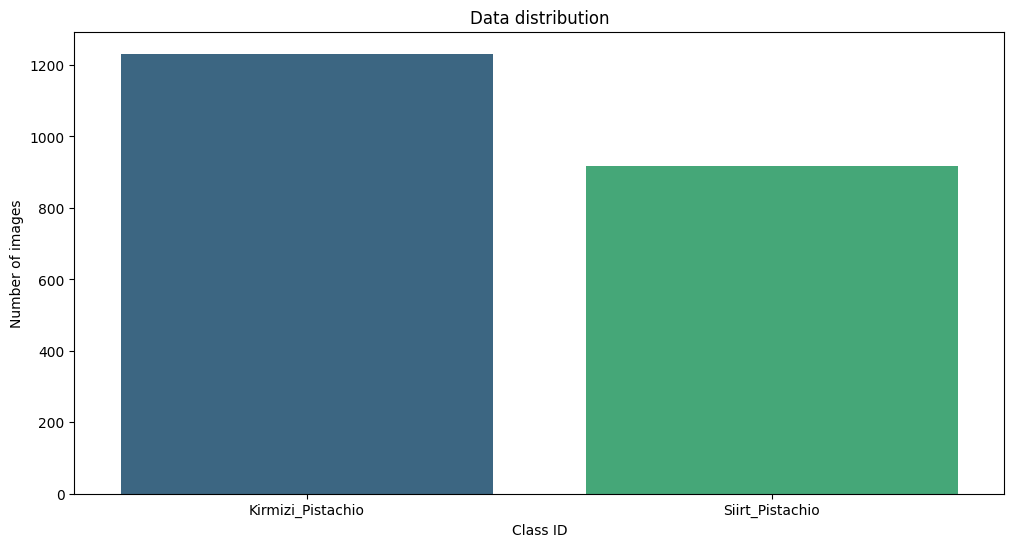

In [10]:
#data distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have class_id_distributionTotal as a pandas DataFrame or Series

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))  # Optional: Set the figure size
sns.barplot(x=class_id_distributionTotal.index, y=class_id_distributionTotal.values, palette="viridis")

# Customize the plot
plt.title('Data distribution')
plt.xlabel("Class ID")
plt.ylabel("Number of images")

# Show the plot
plt.show()

In [11]:
#train test split
from sklearn.model_selection import train_test_split


train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [12]:
#train data distribution
class_id_distributionTrain = train_df['ClassID'].value_counts()
class_id_distributionTrain.head(10)


ClassID
Kirmizi_Pistachio    988
Siirt_Pistachio      730
Name: count, dtype: int64

In [13]:
#test data distribution
class_id_distributionTest = test_df['ClassID'].value_counts()
class_id_distributionTest.head(10)


ClassID
Kirmizi_Pistachio    244
Siirt_Pistachio      186
Name: count, dtype: int64

C:\Users\Mihu\AppData\Local\Temp\ipykernel_22660\3667446931.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_id_distributionTrain.index, y=class_id_distributionTrain.values, palette="viridis")


<Axes: xlabel='ClassID'>

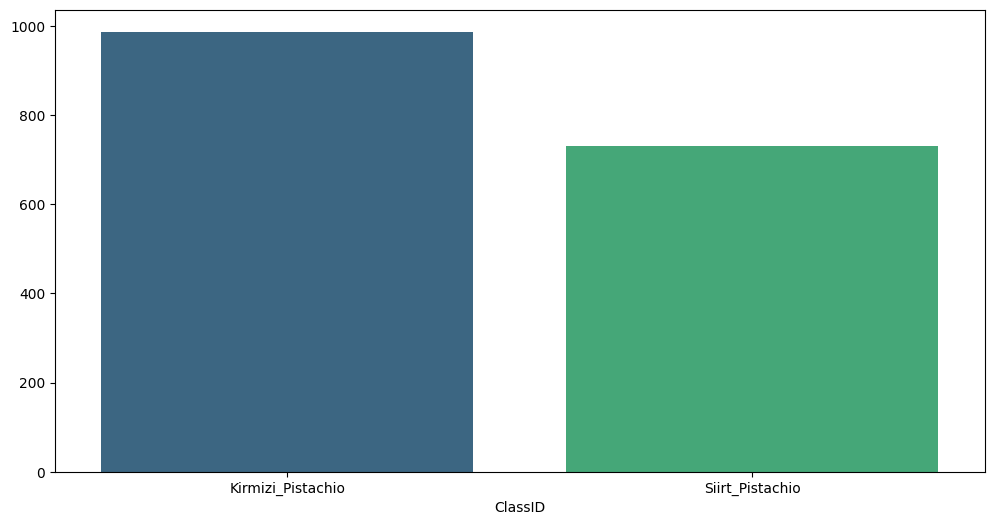

In [14]:
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=class_id_distributionTrain.index, y=class_id_distributionTrain.values, palette="viridis")


In [15]:
#train the model using pytorch
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy



In [16]:
# Define the model architecture
model = models.resnet18(pretrained=True)
num_classes = len(class_id_distributionTrain)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Create data loaders for training and validation datasets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

train_dataset = datasets.ImageFolder(data_dir, data_transforms['train'])
val_dataset = datasets.ImageFolder(data_dir, data_transforms['val'])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)


c:\Users\Mihu\anaconda\envs\mondre\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Mihu\anaconda\envs\mondre\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Train the model for multiple epochs
num_epochs = 10
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0

for epoch in range(num_epochs):
    print(f'Epoch {epoch+1}/{num_epochs}')
    print('-' * 10)

    # Training phase
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        with torch.set_grad_enabled(True):
            outputs = model(inputs.to(device))  # Ensure inputs are on the same device as the model
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    print(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    # Validation phase
    model.eval()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.set_grad_enabled(False):
            outputs = model(inputs.to(device))  # Ensure inputs are on the same device as the model
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(val_dataset)
    epoch_acc = running_corrects.double() / len(val_dataset)

    print(f'Val Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

    # Save the best model
    if epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(model.state_dict())


Epoch 1/10
----------
Train Loss: 0.3666 Acc: 0.8254
Val Loss: 0.1294 Acc: 0.9539
Epoch 2/10
----------
Train Loss: 0.1383 Acc: 0.9483
Val Loss: 0.3316 Acc: 0.8724
Epoch 3/10
----------
Train Loss: 0.1118 Acc: 0.9581
Val Loss: 0.1505 Acc: 0.9330
Epoch 4/10
----------
Train Loss: 0.1365 Acc: 0.9460
Val Loss: 0.0591 Acc: 0.9781
Epoch 5/10
----------
Train Loss: 0.1106 Acc: 0.9595
Val Loss: 0.1458 Acc: 0.9451
Epoch 6/10
----------
Train Loss: 0.0756 Acc: 0.9730
Val Loss: 0.0409 Acc: 0.9828
Epoch 7/10
----------
Train Loss: 0.0807 Acc: 0.9683
Val Loss: 0.0776 Acc: 0.9721
Epoch 8/10
----------
Train Loss: 0.0954 Acc: 0.9637
Val Loss: 0.4700 Acc: 0.8329
Epoch 9/10
----------
Train Loss: 0.0943 Acc: 0.9655
Val Loss: 0.0298 Acc: 0.9902
Epoch 10/10
----------
Train Loss: 0.0918 Acc: 0.9660
Val Loss: 0.0195 Acc: 0.9949


In [28]:
test_loader = torch.utils.data.DataLoader(test_df, batch_size=32, shuffle=False, num_workers=4)
# Load the best model weights
model.load_state_dict(best_model_wts)


<All keys matched successfully>

In [30]:
#save the model
torch.save(model.state_dict(), 'pistachio_model.pth')